<h1 style = "font-size:3rem;color:darkcyan"> Artificial Neuron Implementation </h1>


In [107]:
# import libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors

In [71]:
# modulate between 0 - 1 using the activation function
def sigmoid(h):
    return 1 / (1 + math.e**(-h))

def activate(x, W):
    h = np.dot(x,W)
    y = sigmoid(h)
    return y

In [300]:
def ANN(input_layer, hidden_layers, output_layer):
    layers = []
    layers.append(input_layer)
    layers.extend(hidden_layers)
    layers.append(output_layer)
    print(f'Layers = {layers}')
    
    n_layers = len(layers)
    
    # initialize random weights and
    x = np.random.rand(input_layer)
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111)
    ax.set_title(f'ANN with {n_layers} layers', fontsize = 18)
    ax.set_xlabel('Layer')
    ax.set_ylabel('Neuron')
    
    ax.set_ylim(-1,np.max(layers))
    ax.set_xlim(0,np.max(layers) + np.max(layers) / n_layers)
    x_ticks = np.linspace(0, np.max(layers), n_layers+1)
    x_labels = np.arange(0, n_layers+1, 1)
    step_size = np.max(layers) / n_layers
    print(step_size)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    
    cm = plt.get_cmap('viridis')
    cNorm  = colors.Normalize(vmin=0, vmax=n_layers)
    scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
    
    for i in range(n_layers - 1):
        
        # visualize neurons
        for j in range(layers[i]):
            color = scalarMap.to_rgba(i)
            circle = plt.Circle((i*step_size+step_size, j), 0.2, color=color)
            ax.add_patch(circle)
            ax.text(i*step_size+step_size,j-0.4, format(x[j], '.2f'), fontsize = 9, color = 'grey')
        
        n_connections_in_layer = layers[i] * layers[i+1] 
        #print(n_connections_in_layer)
        
        # create weight matrix for layer
        W = np.random.rand(layers[i], layers[i+1])
        
        a = activate(x, W)
            
        #print(a)
        x = a
    
    print(f'output is {a}')
    for j in range(layers[-1]):
            circle = plt.Circle(((n_layers-1) *step_size + step_size , j), 0.2, color='r')
            ax.add_patch(circle)
            ax.text((n_layers-1) * step_size + step_size,j-0.4, format(x[j], '.2f'), fontsize = 9, color = 'grey')
    
    

Layers = [3, 2, 7, 9, 2, 1]
1.5
output is [0.66148635]


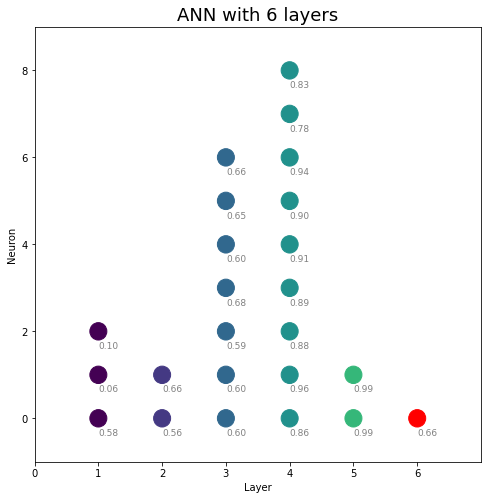

In [301]:
ANN(3,[2,7,9,2], 1)